## 5-1 如何使用Keras 打造神經網路

**Keras 深度學習模型(Models)**

* Sequential模型(Sequential Model):一種線性堆疊結構，神經層是單一輸入和單一輸出，每一層接著連接下一層，並不允許跨層連接。
* Functional API：如果是複雜的多輸入和多輸出，或擁有**共享神經層**的深度學習模型，需要使用 Functional API 來建立 Model 。

**Keras 預建神經層類型**

* 多層感知器(MLP) : 新增 1 個至多個 Dense 層來建立多層感知器，之前都是在說這個。
* 卷積神經網路(CNN) : 做影像識別很準
* 循環神經網路(RNN) : 做NLP

## 5-2 打造分類問題的神經網路 - 糖尿病預測

### 5-2-1 認識皮馬印地安人的糖尿病資料集
預測皮馬印地安人是否會得糖尿病

In [2]:
# 5-2-1 認識皮馬印地安人的糖尿病資料 

import numpy as np
import pandas as pd

np.random.seed(10) # 指定亂數種子
# 載入糖尿病資料集
df = pd.read_csv("./diabetes.csv")

print(df.head())
print(df.shape)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
(768, 9)


**步驟二：定義模型**

神經網路的參數總數 = 輸入層特徵數 * 隱藏層神經元數 + 每個神經元的偏向量 ，例如輸入有 8 個特徵，共有二個隱藏層，第一個隱藏層是 10 ，第二個隱藏層是 8 ，1 個輸出層。

所以是： (8 * 10 + 10) + (10 * 8 + 8) + (8 * 1 + 1) = 90 + 88 + 9 = 187

**步驟三：編譯模型**

常用參數的說明如下：

| 問題種類 | 輸出層啟動函數 | 損失函數 |
|:-----|:-----|:-----|
| 二元分類 | sigmoid | binary_crossentropy |
| 單標籤多元分類 | softmax | categorical_crossentropy |
| 多標籤多元分類 | sigmoid | binary_crossentropy |
| 迴歸分析 | 不需要 | mse |
| 迴歸值在 0~1 之間 | sigmoid | mse 或 binary_crossentropy |



In [14]:
# 5-2-1 認識皮馬印地安人的糖尿病資料 
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

np.random.seed(10) # 指定亂數種子
# 載入糖尿病資料集
df = pd.read_csv("./diabetes.csv")

#print(df.head())
#print(df.shape)

dataset = df.values # 傳回Numpy陣列
np.random.shuffle(dataset) # 使用亂數打亂資料 

# 分割成特徵資料與標籤資料
X = dataset[:,0:8]
Y = dataset[:,8]

# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)


# 定義模型
model = Sequential()
model.add(Dense(10,input_shape=(8,), activation="relu")) # 第一層隱藏層, 參數依序是：神經元數量, 特徵數, 啟動函數(Ch4-4)
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.summary() # 顯示模型摘要資訊 

# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"]) # 參考Ch4-4-2與P5-10，參數依序是：損失函數, 優化器（即梯度下降法）, 評估標準

# 訓練模型
model.fit(X,Y, epochs=150, batch_size=10,verbose=0) # 參數依序是： 特徵資料, 標籤資料, 參數訓練週期, 參數的批次尺寸（Ch4-6-2) , verbose=0為不顯示進度列結果, 預設是 1 顯示

# 評估模型
loss,accuracy = model.evaluate(X,Y) # loss 是損失分數, accuracy 是準確度
print("準確度 = {:.2f}".format(accuracy))

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 10)                90        
_________________________________________________________________
dense_35 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 9         
Total params: 187
Trainable params: 187
Non-trainable params: 0
_________________________________________________________________
768/768 [==============================] - 0s 170us/step
準確度 = 0.80


**在輸出層使用 softmax 啟動函數**

輸出層只有 1 個神經元，所以使用 Sigmoid 啟動函數，因為二元分類也可以使用 Softmax 啟動函數，所以

* 輸出層需改為 2 個神經元
* 標籤資料也需要執行 One-hot Encoding

In [15]:
# 5-2-1 認識皮馬印地安人的糖尿病資料 
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical # One-hot Encoding模組

np.random.seed(7) # 指定亂數種子
# 載入糖尿病資料集
df = pd.read_csv("./diabetes.csv")

#print(df.head())
#print(df.shape)

dataset = df.values
np.random.shuffle(dataset) # 使用亂數打亂資料 

# 分割成特徵資料與標籤資料
X = dataset[:,0:8]
Y = dataset[:,8]

# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# One-hot encoding
Y = to_categorical(Y)

# 定義模型
model = Sequential()
model.add(Dense(10,input_shape=(8,), activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(2, activation="softmax")) # 注意這裡改成 2 個神經元
model.summary() # 顯示模型摘要資訊 

# 編譯模型, 優化器使用sgd
model.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])

# 訓練模型
model.fit(X,Y, epochs=150, batch_size=10,verbose=0)

# 評估模型
loss,accuracy = model.evaluate(X,Y)
print("準確度 = {:.2f}".format(accuracy))

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 10)                90        
_________________________________________________________________
dense_38 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_39 (Dense)             (None, 2)                 18        
Total params: 196
Trainable params: 196
Non-trainable params: 0
_________________________________________________________________
768/768 [==============================] - 0s 191us/step
準確度 = 0.82


**在神經層使用權重初始器(Initializers)**

在 Dense 神經層新增可以初始權重矩陣和偏向量的 2 個參數。

* kernel_initializer 參數：初始神經層的權重矩陣，參數值字串是初始器名稱，預設值是 `glorot_uniform` 。
* bias_initializer 參數：初始偏向量的值，參數值字串是初始器名稱，預設值是 `zeros` 。

| 初始器字串 | 說明 |
|:-----|:-----|
| zeros | 全部初始為 0 |
| ones | 全部初始為 1 |
| ????_normal | 常態分佈的隨機亂數，可以是 `random_normal`、剪裁極端值的 `truncated_normal`，和改良剪裁極端值的 `glorot_normal` |
| ????_uniform | 均勻分布的隨機亂數，可以是 `random_uniform`、在正負範圍之間的 `lecun_nuiform`，和改良正負範圍之間的 `glorot_uniform` |


In [20]:
# 5-2-1 認識皮馬印地安人的糖尿病資料 
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

np.random.seed(7) # 指定亂數種子
# 載入糖尿病資料集
df = pd.read_csv("./diabetes.csv")

#print(df.head())
#print(df.shape)

dataset = df.values
np.random.shuffle(dataset) # 使用亂數打亂資料 

# 分割成特徵資料與標籤資料
X = dataset[:,0:8]
Y = dataset[:,8]

# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# One-hot encoding
Y = to_categorical(Y)  # one-hot encoding分類

# 定義模型
model = Sequential()
model.add(Dense(10, input_shape=(8,),
                kernel_initializer="random_uniform", 
                bias_initializer="ones",
                activation="relu"))
model.add(Dense(8, 
                kernel_initializer="random_uniform",
                bias_initializer="ones",
                activation="relu"))
model.add(Dense(2, 
                kernel_initializer="random_uniform",
                bias_initializer="ones",
                activation="softmax"))
#model.summary() # 顯示模型摘要資訊 

# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])

# 訓練模型
model.fit(X,Y, epochs=150, batch_size=10,verbose=0)

# 評估模型
loss,accuracy = model.evaluate(X,Y)
print("準確度 = {:.2f}".format(accuracy))

768/768 [==============================] - 0s 277us/step
準確度 = 0.78


使用預設的初始器（Initializers）準備度為 `0.82` ，比上述的準確度還要高。

**在編譯模型使用 `adam` 優化器**

優化方法是影響模型效能的重要因素之一，在 Keras 稱為優化器（optimizer），優化器就是各種改良版本的梯度下降法。

In [30]:
# 5-2-1 認識皮馬印地安人的糖尿病資料 
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

np.random.seed(10) # 指定亂數種子
# 載入糖尿病資料集
df = pd.read_csv("./diabetes.csv")

#print(df.head())
#print(df.shape)

dataset = df.values
np.random.shuffle(dataset) # 使用亂數打亂資料 

# 分割成特徵資料與標籤資料
X = dataset[:,0:8]
Y = dataset[:,8]

# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# One-hot encoding
Y = to_categorical(Y)

# 定義模型
model = Sequential()
model.add(Dense(16, input_shape=(8,),
                #kernel_initializer="random_uniform", 
                #bias_initializer="ones",
                activation="relu"))
model.add(Dense(8, 
                #kernel_initializer="random_uniform",
                #bias_initializer="ones",
                activation="relu"))
model.add(Dense(2, 
                #kernel_initializer="random_uniform",
                #bias_initializer="ones",
                activation="softmax"))
#model.summary() # 顯示模型摘要資訊 

# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# 訓練模型
model.fit(X,Y, epochs=150, batch_size=10, verbose=0)

# 評估模型
loss,accuracy = model.evaluate(X,Y)
print("準確度 = {:.2f}".format(accuracy))

768/768 [==============================] - 0s 494us/step
準確度 = 0.87


上述 optimizer 參數值是 `adam` 字串，除了 `sgd` 和 `adam` 外， `rmsprop` 優化器是循環神經網路的最佳選擇之一。

### 5-2-3 調整你的神經網路-減少神經網路的參數量, P5-17

對於我們打造的神經網路，除了下列方法調校

* 特徵標準化
* 修改各神經層的啟動函數
* 初始權重矩陣
* 使用不同的優化器

我們還可以

* 縮小神經網路尺寸，也就是減少神經網路的參數量來改進模型的效能。

In [33]:
# 5-2-1 認識皮馬印地安人的糖尿病資料 
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

np.random.seed(10) # 指定亂數種子
# 載入糖尿病資料集
df = pd.read_csv("./diabetes.csv")

#print(df.head())
#print(df.shape)

dataset = df.values
np.random.shuffle(dataset) # 使用亂數打亂資料 

# 分割成特徵資料與標籤資料
X = dataset[:,0:8]
Y = dataset[:,8]

# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# One-hot encoding
Y = to_categorical(Y)

# 定義模型, 隱藏層可以調整
model = Sequential()
model.add(Dense(10, input_shape=(8,),
                #kernel_initializer="random_uniform", 
                #bias_initializer="ones",
                activation="relu"))
model.add(Dense(6, 
                #kernel_initializer="random_uniform",
                #bias_initializer="ones",
                activation="relu"))
model.add(Dense(2, 
                #kernel_initializer="random_uniform",
                #bias_initializer="ones",
                activation="softmax"))
#model.summary() # 顯示模型摘要資訊 

# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# 訓練模型
model.fit(X,Y, epochs=150, batch_size=10, verbose=0)

# 評估模型
loss,accuracy = model.evaluate(X,Y)
print("準確度 = {:.2f}".format(accuracy))

768/768 [==============================] - 0s 563us/step
準確度 = 0.84


### 5-2-4 使用測試與驗證資料集-說明

p5-18

在實務上，我們應該使用**訓練資料集來訓練模型，測試資料集用來評估模型**，這種方式稱為持久性驗證（Holdout Validation）。更進一步，還可以從訓練資料集分割出部份資料作為驗證資料集。

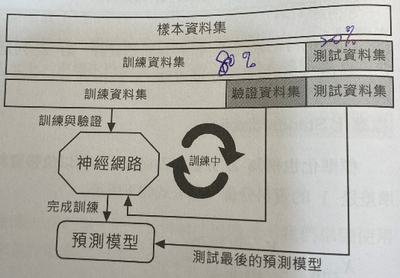

In [37]:
import pandas as pd

df = pd.read_csv("./diabetes.csv")

print(df.head())
print(df.shape)
print(df.describe())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
(768, 9)
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.

In [39]:
# Ch5_2_4.py
# 將資料集分割成訓練和測試資料集

import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

np.random.seed(10)  # 指定亂數種子
# 載入糖尿病資料集
df = pd.read_csv("./diabetes.csv")
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料
# 分割成特徵資料和標籤資料
X = dataset[:, 0:8]
Y = dataset[:, 8]
# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# One-hot編碼
Y = to_categorical(Y)
# 分割訓練和測試資料集
X_train, Y_train = X[:690],Y[:690]    # 訓練資料前690筆
X_test, Y_test = X[690:], Y[690:]       # 測試資料後78筆
# 定義模型
model = Sequential()
model.add(Dense(10, input_shape=(8,), activation="relu"))
model.add(Dense(6, activation="relu"))
model.add(Dense(2, activation="softmax"))
model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="binary_crossentropy", 
              optimizer="adam", 
              metrics=["accuracy"])
# 訓練模型
model.fit(X_train, Y_train, epochs=150, batch_size=10, verbose=0)
# 評估模型
loss, accuracy = model.evaluate(X_train, Y_train, verbose=0)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))


Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_94 (Dense)             (None, 10)                90        
_________________________________________________________________
dense_95 (Dense)             (None, 6)                 66        
_________________________________________________________________
dense_96 (Dense)             (None, 2)                 14        
Total params: 170
Trainable params: 170
Non-trainable params: 0
_________________________________________________________________
訓練資料集的準確度 = 0.84
測試資料集的準確度 = 0.74


基本上，訓練資料集的準確度會高於測試資料集，因為訓練資料是神經網路已經看過的訓練資料，而測試資料集則是神經網路根本沒看過的新資料。

對於沒看到資料的準確度 `74%` 比起 `84%` 低了不少，表示模型的**泛化性不足，有過度擬合的問題**，因為預測模型有過度擬合的現象，可能是訓練週期太多，為了找出最佳的訓練週期，需要在訓練模型使用驗證資料集。


p5-19 在訓練模型時使用驗證資料集(手動分割)

In [44]:
# Ch5_2_4.py
# 將資料集分割成訓練和測試資料集

import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

np.random.seed(10)  # 指定亂數種子
# 載入糖尿病資料集
df = pd.read_csv("./diabetes.csv")
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料
# 分割成特徵資料和標籤資料
X = dataset[:, 0:8]
Y = dataset[:, 8]
# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# One-hot編碼
Y = to_categorical(Y)
# 分割訓練和測試資料集
X_train, Y_train = X[:690],Y[:690]    # 訓練資料前690筆
X_test, Y_test = X[690:], Y[690:]       # 測試資料後78筆
# 定義模型
model = Sequential()
model.add(Dense(10, input_shape=(8,), activation="relu"))
model.add(Dense(6, activation="relu"))
model.add(Dense(2, activation="softmax"))
# model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam", 
              metrics=["accuracy"])
# 訓練模型，直接使用測試資料集作為訓練模型時使用的驗證資料集
history = model.fit(X_train, Y_train, 
                    validation_data=(X_test,Y_test),
                    epochs=150, batch_size=10, verbose=1)
# 評估模型
loss, accuracy = model.evaluate(X_train, Y_train, verbose=0)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))


Train on 690 samples, validate on 78 samples
Epoch 1/150
690/690 [==============================] - 1s 1ms/sample - loss: 0.6708 - acc: 0.5957 - val_loss: 0.6556 - val_acc: 0.6795
Epoch 2/150
690/690 [==============================] - 0s 108us/sample - loss: 0.5645 - acc: 0.7449 - val_loss: 0.5983 - val_acc: 0.6538
Epoch 3/150
690/690 [==============================] - 0s 116us/sample - loss: 0.5226 - acc: 0.7667 - val_loss: 0.5682 - val_acc: 0.6667
Epoch 4/150
690/690 [==============================] - 0s 112us/sample - loss: 0.5009 - acc: 0.7667 - val_loss: 0.5463 - val_acc: 0.6923
Epoch 5/150
690/690 [==============================] - 0s 113us/sample - loss: 0.4888 - acc: 0.7710 - val_loss: 0.5313 - val_acc: 0.7051
Epoch 6/150
690/690 [==============================] - 0s 117us/sample - loss: 0.4799 - acc: 0.7725 - val_loss: 0.5220 - val_acc: 0.7051
Epoch 7/150
690/690 [==============================] - 0s 106us/sample - loss: 0.4745 - acc: 0.7710 - val_loss: 0.5152 - val_acc: 0.717

上述 `fit()` 函式的傳回值是 `history` 歷史記錄物件，使用 `validation_data` 參數指定使用的驗證資料集。

從訓練與測試的準確度來看，仍有過度擬合的問題。

為了找出最佳的訓練週期次數，我們可以使用 `Matplotlib` 以 `fit()` 函式傳回的 `history` 物件，繪出訓練程驗證損失的趨勢圖表。

參考文章 ： [Matplotlib簡介](https://lijin-thu.github.io/06.%20matplotlib/06.01%20pyplot%20tutorial.html)

訓練資料集的準確度 = 0.84
測試資料集的準確度 = 0.69


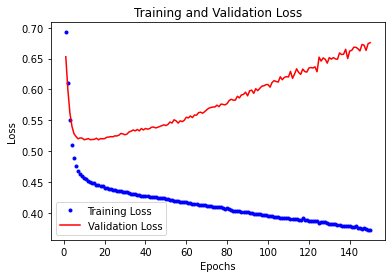

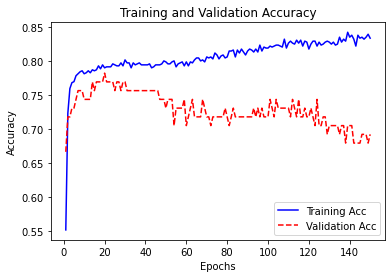

In [45]:
# Ch5_2_4.py
# 將資料集分割成訓練和測試資料集

import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

np.random.seed(10)  # 指定亂數種子
# 載入糖尿病資料集
df = pd.read_csv("./diabetes.csv")
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料
# 分割成特徵資料和標籤資料
X = dataset[:, 0:8]
Y = dataset[:, 8]
# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# One-hot編碼
Y = to_categorical(Y)
# 分割訓練和測試資料集
X_train, Y_train = X[:690],Y[:690]    # 訓練資料前690筆
X_test, Y_test = X[690:], Y[690:]       # 測試資料後78筆
# 定義模型
model = Sequential()
model.add(Dense(10, input_shape=(8,), activation="relu"))
model.add(Dense(6, activation="relu"))
model.add(Dense(2, activation="softmax"))
# model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam", 
              metrics=["accuracy"])
# 訓練模型
history = model.fit(X_train, Y_train, 
                    validation_data=(X_test,Y_test),
                    epochs=150, batch_size=10, verbose=0)
# 評估模型
loss, accuracy = model.evaluate(X_train, Y_train, verbose=0)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))

# 顯示訓練和驗證損失的圖表
import matplotlib.pyplot as plt

loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "b.",label="Training Loss")
plt.plot(epochs, val_loss, "r",label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["acc"]
epochs = range(1, len(loss)+1)
val_acc = history.history["val_acc"]
plt.plot(epochs, acc, "b-",label="Training Acc")
plt.plot(epochs, val_acc, "r--",label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

從上圖可以看出訓練和驗證的損失趨勢，訓練資料集在反覆學習後，損失逐漸下降，準確度會上升，但是，驗證資料集約在 10 次訓練週期左右，其驗證損失就沒有再減少，反而是逐步增加，換句話說，執行再多次的訓練期，只會讓模型更加的過度擬合。

所以，我們的神經網路只需訓練 10 次左右，不用訓練到 150 次。

訓練資料集的準確度 = 0.78
測試資料集的準確度 = 0.68


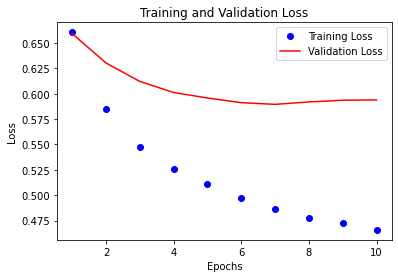

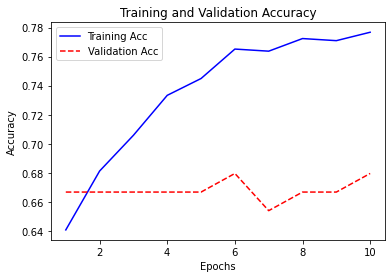

In [47]:
# Ch5_2_4.py
# 將資料集分割成訓練和測試資料集
# epochs調成10次

import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

np.random.seed(10)  # 指定亂數種子
# 載入糖尿病資料集
df = pd.read_csv("./diabetes.csv")
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料
# 分割成特徵資料和標籤資料
X = dataset[:, 0:8]
Y = dataset[:, 8]
# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# One-hot編碼
Y = to_categorical(Y)
# 分割訓練和測試資料集
X_train, Y_train = X[:690],Y[:690]    # 訓練資料前690筆
X_test, Y_test = X[690:], Y[690:]       # 測試資料後78筆
# 定義模型
model = Sequential()
model.add(Dense(10, input_shape=(8,), activation="relu"))
model.add(Dense(6, activation="relu"))
model.add(Dense(2, activation="softmax"))
# model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam", 
              metrics=["accuracy"])
# 訓練模型
history = model.fit(X_train, Y_train, 
                    validation_data=(X_test,Y_test),
                    epochs=10, batch_size=10, verbose=0)
# 評估模型
loss, accuracy = model.evaluate(X_train, Y_train, verbose=0)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))

# 顯示訓練和驗證損失的圖表
import matplotlib.pyplot as plt

loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo",label="Training Loss")
plt.plot(epochs, val_loss, "r",label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["acc"]
epochs = range(1, len(loss)+1)
val_acc = history.history["val_acc"]
plt.plot(epochs, acc, "b-",label="Training Acc")
plt.plot(epochs, val_acc, "r--",label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

上述圖表，若訓練與驗證的損失趨勢是持平，差距變小，表示擬合的問題有改善。

**在訓練模型時，使用驗證資料集（自動分割）**

在 Keras 的 fit() 函式可以使用 `validation_split` 參數自動分割出驗證資料集。

訓練資料集的準確度 = 0.77
測試資料集的準確度 = 0.78


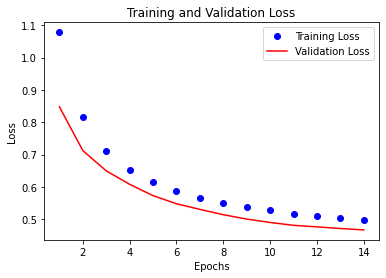

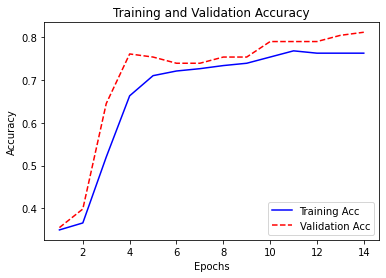

In [48]:
# Ch5_2_4.py
# 將資料集分割成訓練和測試資料集
# epochs調成10次

import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

np.random.seed(10)  # 指定亂數種子
# 載入糖尿病資料集
df = pd.read_csv("./diabetes.csv")
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料
# 分割成特徵資料和標籤資料
X = dataset[:, 0:8]
Y = dataset[:, 8]
# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# One-hot編碼
Y = to_categorical(Y)
# 分割訓練和測試資料集
X_train, Y_train = X[:690],Y[:690]    # 訓練資料前690筆
X_test, Y_test = X[690:], Y[690:]       # 測試資料後78筆
# 定義模型
model = Sequential()
model.add(Dense(10, input_shape=(8,), activation="relu"))
model.add(Dense(6, activation="relu"))
model.add(Dense(2, activation="softmax"))
# model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam", 
              metrics=["accuracy"])
# 訓練模型
history = model.fit(X_train, Y_train, 
                    validation_split=0.2,
                    epochs=14, batch_size=10, verbose=0)
# 評估模型
loss, accuracy = model.evaluate(X_train, Y_train, verbose=0)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))

# 顯示訓練和驗證損失的圖表
import matplotlib.pyplot as plt

loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo",label="Training Loss")
plt.plot(epochs, val_loss, "r",label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["acc"]
epochs = range(1, len(loss)+1)
val_acc = history.history["val_acc"]
plt.plot(epochs, acc, "b-",label="Training Acc")
plt.plot(epochs, val_acc, "r--",label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

`validation_split` 參數值是 `0.2（即 20%）` ，另一個常用值是 `0.33 (33%)` ，因為分割後的訓練資料量更少，所以調整至 14 次訓練週期。

上述圖表可以看到訓練損失與驗證損失都是逐漸下降至幾乎連在一起，表示過度擬合的問題已解決了。

### 5-2-5 模型的預測值

Keras 的 model 物件是呼叫 `evaluate()` 函式，使用批次來計算輸入樣本資料的誤差，幫助我們調整神經網路，如果我們想取得的是模型的預測值，使用的是 `predict()` 函式。

In [54]:
# Ch 5_2_5.py

import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

np.random.seed(10)  # 指定亂數種子
# 載入糖尿病資料集
df = pd.read_csv("./diabetes.csv")
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料
# 分割成特徵資料和標籤資料
X = dataset[:, 0:8]
Y = dataset[:, 8]
# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# One-hot編碼
Y = to_categorical(Y)
# 分割訓練和測試資料集
X_train, Y_train = X[:690], Y[:690]     # 訓練資料前690筆
X_test, Y_test = X[690:], Y[690:]       # 測試資料後78筆
# 定義模型
model = Sequential()
model.add(Dense(10, input_shape=(8,), activation="relu"))
model.add(Dense(6, activation="relu"))
model.add(Dense(2, activation="softmax"))
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam", 
              metrics=["accuracy"])
# 訓練模型
model.fit(X_train, Y_train, 
          #validation_split=0.2,
          epochs=10, batch_size=10, verbose=0)
# 評估模型
loss, accuracy = model.evaluate(X_train, Y_train, verbose=0)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 測試資料集的預測值
Y_pred = model.predict(X_test, batch_size=10, verbose=1)
print(Y_pred[0])

訓練資料集的準確度 = 0.78
測試資料集的準確度 = 0.71
78/78 [==============================] - 0s 3ms/sample
[0.9480228  0.05197725]


In [61]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

np.random.seed(10)  # 指定亂數種子
# 載入糖尿病資料集
df = pd.read_csv("./diabetes.csv")
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料
# 分割成特徵資料和標籤資料
X = dataset[:, 0:8]
Y = dataset[:, 8]
# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# 分割訓練和測試資料集
X_train, Y_train = X[:690], Y[:690]     # 訓練資料前690筆
X_test, Y_test = X[690:], Y[690:]       # 測試資料後78筆
# 定義模型
model = Sequential()
model.add(Dense(10, input_shape=(8,), activation="relu"))
model.add(Dense(6, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam", 
              metrics=["accuracy"])
# 訓練模型
model.fit(X_train, Y_train, epochs=10, batch_size=10, verbose=0)
# 評估模型
loss, accuracy = model.evaluate(X_train, Y_train, verbose=0)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 測試資料集的預測值
Y_pred = model.predict(X_test, batch_size=10, verbose=0)
print(Y_pred[0])

訓練資料集的準確度 = 0.78
測試資料集的準確度 = 0.68
[0.04108566]


In [65]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

np.random.seed(10)  # 指定亂數種子
# 載入糖尿病資料集
df = pd.read_csv("./diabetes.csv")
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料
# 分割成特徵資料和標籤資料
X = dataset[:, 0:8]
Y = dataset[:, 8]
# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# 分割訓練和測試資料集
X_train, Y_train = X[:690], Y[:690]     # 訓練資料前690筆
X_test, Y_test = X[690:], Y[690:]       # 測試資料後78筆
# 定義模型
model = Sequential()
model.add(Dense(10, input_shape=(8,), activation="relu"))
model.add(Dense(6, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam", 
              metrics=["accuracy"])
# 訓練模型
model.fit(X_train, Y_train, epochs=10, batch_size=10, verbose=0)
# 評估模型
loss, accuracy = model.evaluate(X_train, Y_train, verbose=0)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 測試資料集的預測值
Y_pred = model.predict_classes(X_test, batch_size=10, verbose=0)
print(Y_pred[0], Y_pred[1])

訓練資料集的準確度 = 0.78
測試資料集的準確度 = 0.73
[0] [0]


## 5-3 認識線性迴歸 Linear Regression

P5-27

**簡單線性迴歸 Simple Linear Regression**

$ y = a + b*X$

y 是反應變數( Response，或稱應變數)
X 是解釋變數( Explanatory，或稱自變數)
a 是截距（Intercept）
b 是迴歸係數

此公式只有一個解釋變數，當訓練資料找出截距 a 和迴歸係數 b 的值後，就完成預測公式，我們只需使用新值 X ，即可透過公式來預測 y 值。

**多元線性迴歸 Multiple Linear Regression**

此公式不只 1 個解釋變數 X，而是有多個解釋變數 $X_1、X_2...X_k$

$y = a + b_1*X_1 + b_2*X_2 + … + b_k*X_k$

基本上，線性迴歸是研究「1 因 1 果」的問題，多元線性迴歸是一個反應變數 y 和多個解釋變數的關係，是一種「多因 1 果」的問題。

## 5-4 打造迴歸問題的神經網路-波士頓房價預測

### 5-4-1 認識波士頓房屋資料集



In [10]:
import pandas as pd

df = pd.read_csv("./boston_housing.csv")

print(df.head())
print(df.shape)

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
(506, 14)


p5-31
資料量少的時候, 可以使用 K-fold 交叉驗證

本範例 Keras 模型是一個三層神經網路，擁有一個 Dense 隱藏層和輸出層，因為是迴歸分析，輸出層沒有啟動函數，在 `compile()` 函式使用的損失函數是 MSE，評估標準 metrics 是 MAE（Mean Absolute Error，平約絕對誤差），這是誤差絕對值的平均，可以真實反應預測值與標籤值誤差的實際情況。

In [70]:
#Ch5_4_2.py
#建立迴歸分析的神經網路
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

np.random.seed(7)  # 指定亂數種子
# 載入波士頓房屋資料集
df = pd.read_csv("./boston_housing.csv")
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料
# 分割成特徵資料和標籤資料
X = dataset[:, 0:13]
Y = dataset[:, 13]
# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# 分割訓練和測試資料集
X_train, Y_train = X[:404], Y[:404]     # 訓練資料前404筆
X_test, Y_test = X[404:], Y[404:]       # 測試資料後102筆
# 定義模型
def build_model():
    model = Sequential()
    model.add(Dense(32, input_shape=(X_train.shape[1],), activation="relu"))
    model.add(Dense(1))
    # 編譯模型(mse)
    model.compile(loss="mse", optimizer="adam", 
                  metrics=["mae"])
    return model

k = 4
nb_val_samples = len(X_train) // k # 404/4 = 101
nb_epochs = 80
mse_scores = []
mae_scores = []
for i in range(k):
    print("Processing Fold #" + str(i))
    # 取出驗證資料集
    X_val = X_train[i*nb_val_samples: (i+1)*nb_val_samples]
    Y_val = Y_train[i*nb_val_samples: (i+1)*nb_val_samples]
    # 結合出訓練資料集
    X_train_p = np.concatenate(
            [X_train[:i*nb_val_samples],
            X_train[(i+1)*nb_val_samples:]], axis=0)
    Y_train_p = np.concatenate(
            [Y_train[:i*nb_val_samples],
            Y_train[(i+1)*nb_val_samples:]], axis=0)
    model = build_model()
    # 訓練模型
    model.fit(X_train_p, Y_train_p, epochs=nb_epochs, 
              batch_size=16, verbose=0)
    # 評估模型
    mse, mae = model.evaluate(X_val, Y_val, verbose=0)
    mse_scores.append(mse)
    mae_scores.append(mae)
    
print("MSE_val: ", np.mean(mse_scores))
print("MAE_val: ", np.mean(mae_scores))
# 使用測試資料評估模型
mse, mae = model.evaluate(X_test, Y_test, verbose=0)    
print("MSE_test: ", mse)
print("MAE_test: ", mae)


Processing Fold #0
Processing Fold #1
Processing Fold #2
Processing Fold #3
MSE_val:  25.683390683466847
MAE_val:  3.5998988
MSE_test:  15.381472512787463
MAE_test:  3.2175403


**使用比較深的四層神經網路**

In [74]:
#Ch5_4_2.py
#建立迴歸分析的神經網路
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

np.random.seed(10)  # 指定亂數種子
# 載入波士頓房屋資料集
df = pd.read_csv("./boston_housing.csv")
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料
# 分割成特徵資料和標籤資料
X = dataset[:, 0:13]
Y = dataset[:, 13]
# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# 分割訓練和測試資料集
X_train, Y_train = X[:404], Y[:404]     # 訓練資料前404筆
X_test, Y_test = X[404:], Y[404:]       # 測試資料後102筆
# 定義模型
def build_deep_model():
    model = Sequential()
    model.add(Dense(32, input_shape=(X_train.shape[1],), activation="relu"))
    model.add(Dense(32,activation="relu"))
    model.add(Dense(1))
    # 編譯模型(mse)
    model.compile(loss="mse", optimizer="adam", 
                  metrics=["mae"])
    return model

k = 4
nb_val_samples = len(X_train) // k # 404/4 = 101
nb_epochs = 80
mse_scores = []
mae_scores = []
for i in range(k):
    print("Processing Fold #" + str(i))
    # 取出驗證資料集
    X_val = X_train[i*nb_val_samples: (i+1)*nb_val_samples]
    Y_val = Y_train[i*nb_val_samples: (i+1)*nb_val_samples]
    # 結合出訓練資料集
    X_train_p = np.concatenate(
            [X_train[:i*nb_val_samples],
            X_train[(i+1)*nb_val_samples:]], axis=0)
    Y_train_p = np.concatenate(
            [Y_train[:i*nb_val_samples],
            Y_train[(i+1)*nb_val_samples:]], axis=0)
    model = build_model()
    # 訓練模型
    model.fit(X_train_p, Y_train_p, epochs=nb_epochs, 
              batch_size=16, verbose=0)
    # 評估模型
    mse, mae = model.evaluate(X_val, Y_val, verbose=0)
    mse_scores.append(mse)
    mae_scores.append(mae)
    
print("MSE_val: ", np.mean(mse_scores))
print("MAE_val: ", np.mean(mae_scores))
# 使用測試資料評估模型
mse, mae = model.evaluate(X_test, Y_test, verbose=0)    
print("MSE_test: ", mse)
print("MAE_test: ", mae)


Processing Fold #0
Processing Fold #1
Processing Fold #2
Processing Fold #3
MSE_val:  19.976640676507856
MAE_val:  3.2192602
MSE_test:  29.664388694015205
MAE_test:  3.6012385


## 5-5 儲存與載入神經網路模型

在完成神經網路訓練後，我們可以儲存神經網路的模型和權重，其目的是將找出的最佳權重保留下來， Python 程式能夠直接載入神經網路模型與權重來進行預測，如此就不用每次都重複花時間來訓練模型。

### 5-5-1 儲存神經路模型結構與權重

可以使用兩種方式來儲存 
1. 分開儲存模型結構與權重 ： Keras 模型結構可以儲存成 JSON 格式檔案，權重是另一個檔案。
2. 一次完整儲存模型結構與權重 ： Keras 模型可以同時儲存模型結構與權重成為 HDF5 格式的檔案。

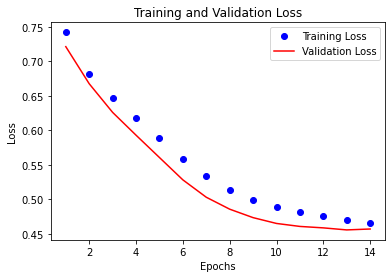

訓練資料集的準確度 = 0.78
測試資料集的準確度 = 0.78


In [80]:
# Ch5_5_1.py
# 方法一：分開儲存模型結構與權重
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

np.random.seed(10)  # 指定亂數種子
# 載入糖尿病資料集
df = pd.read_csv("./diabetes.csv")
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料
# 分割成特徵資料和標籤資料
X = dataset[:, 0:8]
Y = dataset[:, 8]
# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# One-hot編碼
Y = to_categorical(Y)
# 分割訓練和測試資料集
X_train, Y_train = X[:690], Y[:690]     # 訓練資料前690筆
X_test, Y_test = X[690:], Y[690:]       # 測試資料後78筆
# 定義模型
model = Sequential()
model.add(Dense(8, input_shape=(8,), activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(2, activation="softmax"))
# model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam", 
              metrics=["accuracy"])
# 訓練模型
history = model.fit(X_train, Y_train, 
                    validation_split=0.2, 
                    epochs=14, batch_size=10,
                   verbose=0)
# 顯示訓練和驗證損失
import matplotlib.pyplot as plt

loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "r", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 評估模型
loss, accuracy = model.evaluate(X_train, Y_train, verbose=0)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 儲存模型結構
json_str = model.to_json()
with open("Ch5_5_1Model.config", "w") as text_file:
    text_file.write(json_str)
# 儲存模型權重
model.save_weights("Ch5_5_1Model.weight")

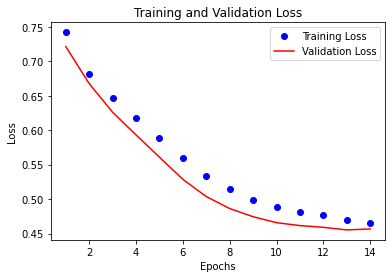

訓練資料集的準確度 = 0.79
測試資料集的準確度 = 0.78


In [83]:
# Ch5_5_1.py
# 方法二：同時儲存模型結構與權重
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

np.random.seed(10)  # 指定亂數種子
# 載入糖尿病資料集
df = pd.read_csv("./diabetes.csv")
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料
# 分割成特徵資料和標籤資料
X = dataset[:, 0:8]
Y = dataset[:, 8]
# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# One-hot編碼
Y = to_categorical(Y)
# 分割訓練和測試資料集
X_train, Y_train = X[:690], Y[:690]     # 訓練資料前690筆
X_test, Y_test = X[690:], Y[690:]       # 測試資料後78筆
# 定義模型
model = Sequential()
model.add(Dense(8, input_shape=(8,), activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(2, activation="softmax"))
# model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam", 
              metrics=["accuracy"])
# 訓練模型
history = model.fit(X_train, Y_train, 
                    validation_split=0.2, 
                    epochs=14, batch_size=10,
                   verbose=0)
# 顯示訓練和驗證損失
import matplotlib.pyplot as plt

loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "r", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 評估模型
loss, accuracy = model.evaluate(X_train, Y_train, verbose=0)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 儲存模型結構和權重
model.save("Ch5_5_1a.h5")

### 5-5-2 載入神經網路模型結構與權重

因為儲存方式有兩種，所以也有對應的兩種方式來載入模型結構與權重。

In [81]:
# Ch5_5_2.py
# 方法一：分開載入神經網路模型結構與權重
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.utils import to_categorical

np.random.seed(10)  # 指定亂數種子
# 載入糖尿病資料集
df = pd.read_csv("./diabetes.csv")
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料
# 分割成特徵資料和標籤資料
X = dataset[:, 0:8]
Y = dataset[:, 8]
# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# One-hot編碼
Y = to_categorical(Y)
# 分割訓練和測試資料集
X_train, Y_train = X[:690], Y[:690]     # 訓練資料前690筆
X_test, Y_test = X[690:], Y[690:]       # 測試資料後78筆
# 載入模型結構
from keras.models import model_from_json

model = Sequential()
with open("Ch5_5_1Model.config", "r") as text_file:
    json_str = text_file.read()
model = model_from_json(json_str)
# 載入權重
model.load_weights("Ch5_5_1Model.weight", by_name=False)
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam", 
              metrics=["accuracy"])
# 評估模型
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 測試資料集的預測值
predict_values = model.predict(X_test, batch_size=10, verbose=0)
print(predict_values[0])


測試資料集的準確度 = 0.78
[0.9413387  0.05866135]


In [84]:
# Ch5_5_2a.py
# 方法二：同時載入神經網路模型結構與權重
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.utils import to_categorical

np.random.seed(10)  # 指定亂數種子
# 載入糖尿病資料集
df = pd.read_csv("./diabetes.csv")
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料
# 分割成特徵資料和標籤資料
X = dataset[:, 0:8]
Y = dataset[:, 8]
# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# One-hot編碼
Y = to_categorical(Y)
# 分割訓練和測試資料集
X_train, Y_train = X[:690], Y[:690]     # 訓練資料前690筆
X_test, Y_test = X[690:], Y[690:]       # 測試資料後78筆
# 載入模型
from keras.models import load_model

model = Sequential()
model = load_model("Ch5_5_1a.h5")
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam", 
              metrics=["accuracy"])
# 評估模型
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 測試資料集的預測值
predict_values = model.predict(X_test, batch_size=10, verbose=0)
print(predict_values[0])

測試資料集的準確度 = 0.78
[0.94128495 0.0587151 ]
